# 강의 01 : 소개

### 참고자료

1. Andrew Ng's ML class
  1. https://class.coursera.org/ml-003/lecture (앤드류 응 교수님꺼 무조건 들으셈)
  2. http://www.holehouse.org/mlclass/ (앤드류 응 교수님 수업 필기본)

2. Convolutional Neural Networks for Visual Recognition.
  1. http://cs23ln.github.io/

3. Tensorflow
    1. https://www.tensorflow.org
    2. https://github.com/aymericdamien/TensorFlow-Examples (텐서 예시들)

# 강의 02 : ML 이란?

### Machine Learning 은 무엇인가?

__배경 :__ Limitations of explicit programming : 특정한 조건에 어떤 행동을하라고 구체적인 지시를 일일이 하는 것에는 한계가 있다.

ex) 스팸 필터(조건 너무 많음), 자동운전시스템(조건많)

__탄생 :__
Arthur Samuel (1959) : 머신러닝은 개발자의 그런 구체적인 명령없이 컴퓨터가 스스로 배울 수 있는 능력을 갖는 것.

### Supervised/Unsupervise learning

__Supervised learning :__ label 이 정해진, 답이 있는 예시들을 가지고 배우는 것

ML에서 대부분의 문제 유형들은 Supervised learning 이다.

ex : 이미지 라벨링, 스팸메일 구분, 점수 예측.

__Types of supervised learning :__ 지도 학습의 종류
1. Regression (회귀) ; 실수값을 예측하는 것. 변수 값들에 맞는 곡선이나 직선을 예측하는 것. 오차를 최소한으로 함.
    ex) 공부시간에 따른 점수 분포
2. Binary classification (이분법 분류) : 딱 두 가지의 종류로 분류하는 것
3. Multi-label classification (다중 라벨 분류) ; 여러 가지의 라벨로 분류하는 것.

__Unsupervised learning :__ label 이 없고, grouping, clustering 같이 묶는 것 등.


# 강의 03 : TensorFlow의 설치 및 기본적인 operations

### Tensorflow란?

Tensor : 데이터 중에서 3차원 데이터.

Data Flow Graph : 노드와 엣지로 연결된 그래프. 데이터는 엣지를 통해 흐른다.

### 기본적인 operations (TF version 1)

#### constant, Session

__tf.constant(" ") :__ 텐서플로우에서 쓰는 변수. 해당 값의 노드를 추가한다.

__tf.Session() :__ 텐서플로우 1 에서는 session을 만들고 거기에서 run을 하여 print 할 수 있었다.

__print(sess.run(변수)) :__ 해당 constant 노드를 실행하여 print 한다.

In [2]:
import tensorflow as tf

In [3]:
hello = tf.constant("Hello, TensorFlow!")

In [4]:
print(hello)

tf.Tensor(b'Hello, TensorFlow!', shape=(), dtype=string)


In [ ]:
# TF 1 버전
hello = tf.constant("Hello, TensorFlow!")

sess = tf.Session()

print(sess.run(hello))

#### node add 노드 더하기

node = tf.add(node1, node2)

node = node1 + node2

In [5]:
node1 = tf.constant(1.0, tf.float32)
node2 = tf.constant(2.3, tf.float32)
node3 = tf.add(node1, node2)

print(node3)

tf.Tensor(3.3, shape=(), dtype=float32)


In [6]:
node4 = node1 + node2

print(node4)

tf.Tensor(3.3, shape=(), dtype=float32)


In [ ]:
# TF 1 버전
node3 = node1 + node2

sess = tf.Session()

print(sess.run(node3))

#### Placeholder 노드 : 지정해주는 값을 변수로 가짐.

TF2 에서는 placeholder 가 없고 그냥 함수를 정의한다.

tf.placeholder( data type ) : run 할 당시에 들어오는 값을 노드로 만든다.

feed_dict 가 들어오는 값.

In [11]:
@tf.function
def adder(a, b):
    return a + b
    
A = tf.constant(2)
B = tf.constant(3)

print(adder(A, B))

tf.Tensor(5, shape=(), dtype=int32)


In [ ]:
# TF1  example
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)
adder_noder = a + b
sess.run(adder_node, feed_dict={a: 3, b: 4.5})
sess.run(adder_node, feed_dict={a: [1, 3], b: [2, 4]})) #이런 식으로 array 더하기 가능

#### TensorFlow 기본정보 (Tensor Ranks, Shapes, and Types)

__Tensor Ranks :__ 몇 차원 array냐를 물어보는 것.

|랭크|이름|예시|
|:-|-|:-|
|0랭크|스칼라|(값만 있음) ex 483|
|1랭크|벡터|(값과 방향) ex [1, 2, 3]|
|2랭크|매트릭스|(수의 표) ex [[1, 2, 3], [2, 3, 4], [5, 6, 7]]|
|3랭크|3-Tensor|(수의 큐브) ex [[[1], [2], [3]], [[3], [4], [5]], [[5], [5], [7]]]|
|n랭크|n-tensor|ex|


__Tensor Shapes :__ 각각의 엘리먼트에 몇 개씩 들어있느냐.

|Rank |Shape |Dimension number|
|-|-|-|
|0랭크 |[]| 0-D|
|1랭크 |[D0]| 1-D|
|2랭크 |[D0, D1]| 2-D|
|3랭크 |[D0, D1, D2]| 3-D|
|n랭크 |[D0, D1, D2 ... ]|


__Tensor Types__

주로 tf.float32 와 tf.int32를 많이 쓴다.


__TensorFlow Mechanics__
1. Build graph using TensorFlow operations : 텐서플로우 그래프 빌드하기
2. sess.run (op) : 그래프 돌리기
3. 그래프 변수 업데이트.

# 강의 04 : Linear Regression 

### Linear Regression

Linear Regression : 주어진 데이터들을 학습하여 실수값을 예측할 수 있는 직선 모델.

기본적으로 많은 자연 현상들은 직선을 띈다.

__학습 :__ 데이터에 맞는 선(모델)을 찾는 것.

__Linear :__ 즉 직선형 모델. $H(x)=Wx+b$

*Hypothesis 가설

### 어떤 모델(가설)이 최적일까?

기본적으로 원래 데이터와 예측한 값과의 거리가 멀수록 안좋은 모델이다.

__Cost function(Loss function) :__ 예측 값과 원래 데이터와의 거리를 구하는 함수

__학습의 목적 :__ 즉 cost 함수를 최소화하는 것. 최적화하는 것이 학습의 목적이다.

### cost function(loss function) :

cost function(loss function) : 예측값과 원래 y 간의 거리 구하는 함수.

가장 기본적인 cost function : $H(x)-y$  // 절댓값 처리가 안되어 있음.

__가장 자주쓰는 cost function :__ $(H(x)-y)^2$  // 절댓값 처리도 되고, 거리가 멀수록 페널티 줄 수 있음. 오차제곱의 평균

cost function : $cost=\frac{1}{m}\sum_{i=1}^m(H(x^{(i)})-y^{(i)})^{2}$ 일반적인 데이터에서 cost 함수

*m:총 데이터 개수.

__cost function(W, b) :__ $cost(W, b)=\frac{1}{m}\sum_{i=1}^m(H(x^{(i)})-y^{(i)})^{2}$ cost 함수, 손실 함수는 W, b에 대한 함수가 된다.

*$H(x)=Wx+b$이므로 W와 b값이 변화함에 따라서 cost 함수 값이 변화함.

__즉 학습의 목적은 cost(W, b)가 가장 작게 나올 때의 W와 b를 구하는 것.__

# 강의 05 : Linear Regression Tensorflow로 구현 (실습)

### TF Version 1

In [1]:
import tensorflow as tf

목적 : x와 y는 이미 정해져 있다. 정해진 X y에 해당하는 최적의 W b를 찾는 것.

1. W, b를 랜덤으로 일단 변수로 잡는다.
2. hypothesis = X * W + b
3. cost function 을 오차제곱의 평균으로 잡는다.
4. cost function 을 줄이는 최적화 방법 : 경사하강법. (learning_rate 설정)
    - 여기서 W, b가 계속 업데이트 된다.
5. train 반복

In [ ]:
# Lab 2 Linear Regression
# X and Y data
x_train = [1, 2, 3]
y_train = [1, 2, 3]

# Try to find values for W and b to compute y_data = x_data * W + b
# We know that W should be 1 and b should be 0
# But let TensorFlow figure it out
W = tf.Variable(tf.random_normal([1]), name="weight")
b = tf.Variable(tf.random_normal([1]), name="bias")

# Our hypothesis XW+b
hypothesis = x_train * W + b

# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - y_train))

# optimizer
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

# Launch the graph in a session.
with tf.Session() as sess:
    # Initializes global variables in the graph.
    sess.run(tf.global_variables_initializer())


    # Fit the line
    for step in range(2001):
        _, cost_val, W_val, b_val = sess.run([train, cost, W, b])

# Learns best fit W:[ 1.],  b:[ 0.]
        if step % 20 == 0:
            print(step, cost_val, W_val, b_val)

'''
# Learns best fit W:[ 1.],  b:[ 0.]
"""
0 2.82329 [ 2.12867713] [-0.85235667]
20 0.190351 [ 1.53392804] [-1.05059612]
40 0.151357 [ 1.45725465] [-1.02391243]
...
1920 1.77484e-05 [ 1.00489295] [-0.01112291]
1940 1.61197e-05 [ 1.00466311] [-0.01060018]
1960 1.46397e-05 [ 1.004444] [-0.01010205]
1980 1.32962e-05 [ 1.00423515] [-0.00962736]
2000 1.20761e-05 [ 1.00403607] [-0.00917497]
'''
"""

### TF Verision 2

__Sequential()__

ex : tf.keras.Sequential()

각각 레이어에 정확히 하나의 입력 텐서와 하나의 출력 텐서가 있는 일반 레이어 스택일 때 적합하다.

선형 모델, 순차 모델. 들어오는 방향이 한 군데, 나가는 방향도 한 군데.

모델의 큰 형태. templete 느낌. 껍데기고, 내부를 채워야 함.

input_shape를 모르면 weight 값이 없어서 summary를 볼 수가 없다.

__Dense()__

기본적으로 hidden layer 만들 수 있는 layer. 노드 수를 정해줄 수 있다.

output : input과 가중치값을 dot하고 + bias를 하여 활성화함수에 넣는다.

input rank 가 2보다 크다면 input 과 kernel(가중치)는 dot 계산을 한다.

__입력 형태정보 :__ Sequential 모델의 첫번째 레이어는 입력형태 정보 필요.

__Dense :__ 2D 레이어 이기 때문에, 입력 형태를 input_dim 으로 넣어줄 수 있다.

__input shape ;__ input_shape=(None, 10) 등 정수와 None으로 이루어진 튜플.

나머지 레이어들은 input_shape=(12, 2) 등의 튜플 형태로 써야한다. None은 음이 아닌 어떠한 정수를 받을 수 있음.

ex : tf.keras.layers.Dense(units=1, input_dim=1)) 
    - units : output shape
    - input_dim : input shape
    
ex : tf.keras.layers.Dense(10, input_shape=(1, ))

__compile()__ : 학습시키기 전, 학습 방식에 대한 환경설정.

1. optimizer(정규화기) : SGD 같은 것.
2. loss function(손실 함수) : mse 같은 것. mean_squared_error , $\frac{1}{m} * \sum(y'-y)^2$
3. metric (기준) : metrics=['accuracy']

In [2]:
import numpy as np

In [3]:
x_train = [1, 2, 3, 4]
y_train = [0, -1, -2, -3]

tf.model = tf.keras.Sequential()
# units == output shape, input_dim == input shape
tf.model.add(tf.keras.layers.Dense(units=1, input_dim=1))

sgd = tf.keras.optimizers.SGD(lr=0.1)  # SGD == standard gradient descendent, lr == learning rate
tf.model.compile(loss='mse', optimizer=sgd)  # mse == mean_squared_error, 1/m * sig (y'-y)^2

# prints summary of the model to the terminal
tf.model.summary()

# fit() executes training
tf.model.fit(x_train, y_train, epochs=200)


# predict() returns predicted value
y_predict = tf.model.predict(np.array([5, 4]))
print(y_predict)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
1/1 [==============================] - 0s 240ms/step - loss: 2.7035
Epoch 2/200
1/1 [==============================] - 0s 2ms/step - loss: 1.2692
Epoch 3/200
1/1 [==============================] - 0s 999us/step - loss: 0.6219
Epoch 4/200
1/1 [==============================] - 0s 2ms/step - loss: 0.3282
Epoch 5/200
1/1 [==============================] - 0s 2ms/step - loss: 0.1935
Epoch 6/200
1/1 [==============================] - 0s 1000us/step - loss: 0.1303
Epoch 7/200
1/1 [==============================] - 0s 2ms/step - loss: 0.0993
Epoch 8/200
1/1 [==============================] - 0s 2ms/step - loss: 0.0830
Epoch 9/200
1/1 [========

1/1 [==============================] - 0s 1000us/step - loss: 9.5915e-07
Epoch 194/200
1/1 [==============================] - 0s 2ms/step - loss: 9.0262e-07
Epoch 195/200
1/1 [==============================] - 0s 999us/step - loss: 8.4933e-07
Epoch 196/200
1/1 [==============================] - 0s 2ms/step - loss: 7.9930e-07
Epoch 197/200
1/1 [==============================] - 0s 2ms/step - loss: 7.5206e-07
Epoch 198/200
1/1 [==============================] - 0s 1000us/step - loss: 7.0779e-07
Epoch 199/200
1/1 [==============================] - 0s 2ms/step - loss: 6.6596e-07
Epoch 200/200
1/1 [==============================] - 0s 2ms/step - loss: 6.2672e-07
[[-3.9986835]
 [-2.9993227]]


# 강의 06 : Linear Regression의 cost 최소화
## SGD 원리 (Standard Gradient Descendent)

### 가설 간단화 Simplified hypothesis

$H(x) = Wx$ 계산을 간단히 보여주기 위해서 bias 를 없앤다. 그렇게 되면 cost function은

$cost(W) = \frac{1}{m}\sum_{i=1}^m(Wx^{(i)}-y^{(i)})^2$

cost(W)함수는 W의 변화에 따른 Cost 값을 보여준다.

이 함수는 이차함수 형태를 갖는다.

### Gradient Descent algorithm (경사하강법)  : cost 함수를 최소화하자.

- loss 함수를 최소화하다
- 대부분의 최소화 문제에서 경사 하강법을 사용한다
- cost(loss)를 최소화 하기위한 W, b를 찾는다.
- 실생활에서는 함수의 극값을 찾을 수 없기 때문에 사용하는 방법.

__작동원리__

- 랜덤 초기값( 혹은 특정한 초기값 )에서 시작한다.
- W, b 에 따른 경사값이 0이 되는 방향으로 계속 진행한다
- 어디서 시작하는지가 어느 최솟값으로 끝나는지를 결정한다.

__Convex function__

- SGD는 가끔 시작점의 변화(W, b)에 따라 최솟값이 아닌 local 최솟값에 수렴할 수 있다. (제대로 동작 X)
- 우리의 현재 cost(W, b) 함수는 밥그릇 뒤집어 놓은 Convex function 이다.
- Convex function의 경우 SGD를 사용하면 무조건 답을 찾을 수 있다.
- Convex function 인지 아닌지 확인 필요.

### SGD 수식 표현

1. $cost(W) = \frac{1}{m}\sum_{i=1}^m(Wx^{(i)}-y^{(i)})^2$ 를 2로 나눠 계산을 편하게 한다. (결과에는 지장 없음)
2. $cost(W) = \frac{1}{2m}\sum_{i=1}^m(Wx^{(i)}-y^{(i)})^2$ cost함수를 W에 대해 편미분 한다.
3. $W :=W - \alpha\frac{\partial}{\partial W}cost(W)$ W에 대한 cost 함수 이므로, W에 대해 편미분한다. 그리고 W를 업데이트한다.
4. $W :=W - \alpha\frac{\partial}{\partial W}\frac{1}{2m}\sum_{i=1}^m(Wx^{(i)}-y^{(i)})^2$ 편미분하는 과정
5. $W :=W - \alpha\frac{1}{m}\sum_{i=1}^m(Wx^{(i)}-y^{(i)})x^{(i)}$ W에 대한 곱미분이다.

SGD 정리 : $W :=W - \alpha\frac{\partial}{\partial W}\frac{1}{m}\sum_{i=1}^m(Wx^{(i)}-y^{(i)})x^{(i)}$

여기서 $\alpha$는 learning rate 이다. 얼마나 학습할 것인지를 정한다. 현재 기울기를 얼마나 반영하여 뺄 것인가.

여기서 $\frac{1}{m}\sum_{i=1}^m(Wx^{(i)}-y^{(i)})x^{(i)}$ 이 부분은 현재 W에 의한 cost 값의 기울기이다.

따라서 현재 기울기가 양수라면 값이 줄어들어 0에 가까워질 것이고, 현재 기울기가 음수라면 값이 늘어가 0에 가까워질 것이다.

# 강의 07 : Linear Regression의 cost 최소화 구현 (실습)
## SGD (Standard Gradient Descendent)

## TF version 1

### 1. SGD 없이 W 변화에 따른 cost 함수 그려보기

In [ ]:
import matplotlib.pyplot as plt

X = [1, 2, 3]
Y = [1, 2, 3]

W = tf.placeholder(tf.float32)

# Our hypothesis for linear model X * W
hypothesis = X * W

# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Variables for plotting cost function
W_history = []
cost_history = []

# Launch the graph in a session.
with tf.Session() as sess:
    for i in range(-30, 50):
        curr_W = i * 0.1
        curr_cost = sess.run(cost, feed_dict={W: curr_W})

        W_history.append(curr_W)
        cost_history.append(curr_cost)

# Show the cost function
plt.plot(W_history, cost_history)
plt.show()

### 2. 미분을 이용하여 직접 SGD 구현하기

In [ ]:
# A 버전. 직접 구현

learning_rate = 0.1
gradient = tf.reduce_mean((W * X - Y) * X)
descent = W - learning_rate * gradient
update = W.assign(descent)

In [ ]:
# B 버전. optimizer 사용

train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

위의 A 버전과 B 버전은 같은 것이다.

In [ ]:
# Lab 3 Minimizing Cost

x_data = [1, 2, 3]
y_data = [1, 2, 3]

# Try to find values for W and b to compute y_data = W * x_data
# We know that W should be 1
# But let's use TensorFlow to figure it out
W = tf.Variable(tf.random_normal([1]), name="weight")

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

# Our hypothesis for linear model X * W
hypothesis = X * W

#### cost 함수와 SGD 구현
# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize: Gradient Descent using derivative: W -= learning_rate * derivative
learning_rate = 0.1
gradient = tf.reduce_mean((W * X - Y) * X)
descent = W - learning_rate * gradient
update = W.assign(descent)

######################

# Launch the graph in a session.
with tf.Session() as sess:
    # Initializes global variables in the graph.
    sess.run(tf.global_variables_initializer())

    for step in range(21):
        _, cost_val, W_val = sess.run(
            [update, cost, W], feed_dict={X: x_data, Y: y_data}
        )
        print(step, cost_val, W_val)

### 3. SGD 로 얻은 gradients 확보. (알아서 재 가공후 적용 가능)

optimizer로 GradientDescentOptimizer 사용 후, gradient를 다음과 같이 얻을 수 있다.

gvs = optimizer.compute_gradients(cost)

apply_gradients = optimizer.apply_gradients(gvs)

In [ ]:
# tf Graph Input
X = [1, 2, 3]
Y = [1, 2, 3]

# Set wrong model weights
W = tf.Variable(5.)

# Linear model
hypothesis = X * W

# Manual gradient
gradient = tf.reduce_mean((W * X - Y) * X) * 2

# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize: Gradient Descent Optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)

# Get gradients
gvs = optimizer.compute_gradients(cost)

# Optional: modify gradient if necessary
# gvs = [(tf.clip_by_value(grad, -1., 1.), var) for grad, var in gvs]

# Apply gradients
apply_gradients = optimizer.apply_gradients(gvs)

# Launch the graph in a session.
with tf.Session() as sess:
    # Initializes global variables in the graph.
    sess.run(tf.global_variables_initializer())

    for step in range(101):
        gradient_val, gvs_val, _ = sess.run([gradient, gvs, apply_gradients])
        print(step, gradient_val, gvs_val)

## TF version 2

### tf.model.fit(x_train, y_train, epochs= ).history 하면 loss 내역을 볼 수 있다.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1/1 [==============================] - 0s 150ms/step - loss: 0.3681
Epoch 2/100
1/1 [==============================] - 0s 1000us/step - loss: 0.2391
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 0.1769
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 0.1448
Epoch 5/100
1/1 [==============================] - 0s 2ms/step - loss: 0.1265
Epoch 6/100
1/1 [==============================] - 0s 2ms/step - loss: 0.1147
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: 0.1060
Epoch 8/100
1/1 [==============================] - 0s 2ms/step - loss: 0.0989
Epoch 9/100
1/1 [========

1/1 [==============================] - 0s 1ms/step - loss: 4.3828e-04
Epoch 98/100
1/1 [==============================] - 0s 1ms/step - loss: 4.1243e-04
Epoch 99/100
1/1 [==============================] - 0s 2ms/step - loss: 3.8810e-04
Epoch 100/100
1/1 [==============================] - 0s 2ms/step - loss: 3.6521e-04
[[-3.9682183]
 [-2.983647 ]]


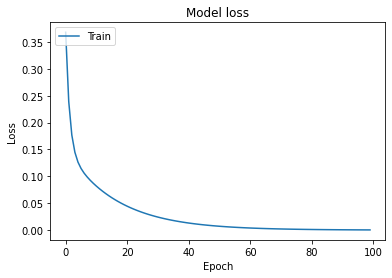

In [5]:
import numpy as np
import matplotlib.pyplot as plt

x_train = [1, 2, 3, 4]
y_train = [0, -1, -2, -3]

tf.model = tf.keras.Sequential()
tf.model.add(tf.keras.layers.Dense(units=1, input_dim=1))

sgd = tf.keras.optimizers.SGD(lr=0.1)
tf.model.compile(loss='mse', optimizer=sgd)

tf.model.summary()

# fit() trains the model and returns history of train
history = tf.model.fit(x_train, y_train, epochs=100)

y_predict = tf.model.predict(np.array([5, 4]))
print(y_predict)

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# 강의 08 : multi-variable linear regression

복습 recap

1. Hypothesis : 우리의 가설, 우리의 예측을 어떻게 할 것인지.

2. Cost function : 우리가 잘 예측했는지, cost가 얼마나 나오는지 확인

3. Gradient descent algorithm : cost 함수를 최적화하는 알고리즘.

input 하나가 아니라 여러개라면? 어떻게 할까?

quiz1 quiz2 quiz3의 변수(input)을 가지고 y값을 예측할 수 있을까?

다변수일 때, 간단하게 표현하는 Hypothesis

$H(x_1, x_2, x_3) = w_1x_1 + w_2x_2 + w_3x_3 + b$

$H(x_1, x_2, x_3, ... , x_n) = w_1x_1 + w_2x_2 + w_3x_3 + ... + w_nx_n + b$ // 이와같이 다변수여도 그냥 변수마다 가중치 곱해주고 + bias

$cost(W, b) = \frac{1}{m}\sum_{i=1}^m(H(x_1^{(i)}, x_2^{(i)}, x_3^{(i)})-y^{(i)})^2$ 

### 조금 불편한 것이 생긴다.

많아지면 많아질수록 옆으로 길게 곱을 계속해야 하는가? 잘 처리하는 방법이 없나?

__Matrix__ 

Matrix multiplication(매트릭스의 곱셈) : 매트릭스의 곱셈을 표현하여 우리가 하고싶은 가설을 표현한다.

$(x_1 x_2 x_3)\cdot$ $ \begin{pmatrix}
w_1\\ 
w_2\\
w_3
\end{pmatrix}$ $= (x_1w_1 + x_2w_2 + x_3w_3)$

우리에게 필요한 긴 값을 매트릭스로 표현하면 짧게 표현할 수 있다.

wx 와 xw는 같지 사실. 그러나 매트릭스이기 때문에 표현해주면

그래서 매트릭스를 쓸 때에는 $H(X) = XW$ 라고 표현한다. 또한 대문자는 매트릭스의 표현이다.



### 실제 데이터에 표현하기 - Many instances

실제 데이터의 경우에는 데이터 instance가 많다. 세로로의 갯수를 말하는 것. 한 데이터 세트 X_train 과 Y의 세트를 instance라고 함.

물론 instance 각각을 계속 넣어서 weight 를 구하는 방법도 있다. 그러나 효율성이 떨어진다.

### 매트릭스의 놀라운점. Hypothesis using matrix

instance만 늘어나고 weight 의 갯수는 그대로 해도 매트릭스의 곱셈을 이용하면 원하는 것을 다 얻을 수 있다.

$ \begin{pmatrix}
x_{11} x_{12} x_{13}\\ 
x_{21} x_{22} x_{23}\\
x_{31} x_{32} x_{33}\\
x_{41} x_{42} x_{43}\\
x_{51} x_{52} x_{53}
\end{pmatrix} \cdot$ $\begin{pmatrix}
w_1\\ 
w_2\\
w_3
\end{pmatrix}$ $ = \begin{pmatrix}
x_{11}w_1+ x_{12}w_2+ x_{13}w_3\\ 
x_{21}w_1+ x_{22}w_2+ x_{23}w_3\\
x_{31}w_1+ x_{32}w_2+ x_{33}w_3\\
x_{41}w_1+ x_{42}w_2+ x_{43}w_3\\
x_{51}w_1+ x_{52}w_2+ x_{53}w_3
\end{pmatrix}$

[5, 3] * [3, 1] = [5, 1]

$H(X) = XW$

매트릭스의 또 다른 장점은 인스턴스가 많을 때, 인스턴스의 전체를 매트릭스에 넣고 w를 곱해버리면 우리가 원하는 값을 얻음.

### 종종하는 매트릭스 계산

$H(X) = XW$

여기서 X는 데이터에 따라 나오는 것이기 때문에 종종 주어진다.
    - ex [5, 3]
    - 여기서 5는 instance의 개수
    - 여기서 3은 variable 변수의 개수

여기서 H(X) 출력값도 종종 주어진다. (특히 linear regression 경우에는 출력값이 하나만 나오기 때문에)
    - ex [5, 1]
   
__우리가 설계해야 하는 것, W에 해당하는 weight의 크기를 얼마로 할 것인가.__

X 즉 데이터의 변수 개수를 가져온다. ex 3

H(x) 결과값의 개수를 가져온다. ex 1

그러면 W 매트릭스는 [3, 1] 이다. X 변수 개수와 결과값의 형태 개수가 W 매트릭스의 형태.

### instance가 여러개 n개 일때

X W = H(X)

[n, 3] [3, 1] [n, 1]

[None, 3] [3, 1][None, 1] 텐서플로우에서는 양의 정수를 None으로 표시.

### 출력이 하나가 아닐 때에도 쓰기 좋음.

입력 : n개의 입력과 3개의 변수가 있을 때 = [n, 3]

출력 : 2개의 출력을 원한다. = [n, 2]

W : [3, 2]

__매트릭스의 경우에는 멀티 변수의 경우와 다 인스턴스 경우와 다 출력 경우 모두 해결할 수 있다.__

### WX vs XW

이론에서 렉쳐에서는 $H(x)=Wx+b$ 라고 쓰고

현실에서, 실무에서는 $H(X) = XW$ 이렇게 쓴다.

그러나 둘의 차이는 매트릭스 이고 아니고 이다.(다변수 일때 매트릭스)